# Logistic Regression

For this activity, we work as a consultant for an airline. 

The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like us to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Our goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

## Imports

### Import packages

In [ ]:
# Standard operational package imports.
import numpy as np
import pandas as pd
from IPython.display import display

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [ ]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

Output the first 10 rows of data.

In [ ]:
display(df_original.head(n = 10))

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Data Exploration, Data Cleaning, and Model Preparation


### Prepare the data

After loading the dataset, we're gonna prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

We check the data type of each column.

In [ ]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, we need to check how many customers in the dataset are satisfied before modeling.

In [ ]:
df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

There were 71,087 satisfied customers and 58,793 dissatisfied customers.

54.7 percent (71,087/129,880) of customers were satisfied. While this is a simple calculation, this value can be compared to a logistic regression model's accuracy. 

### Check for missing values

In [ ]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

For this activity, the airline is specifically interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. 

The `Arrival Delay in Minutes` column won't be included in the binomial logistic regression model; however, the airline might become interested in this column in the future.

For now, the missing values should be removed for two reasons:

* There are only 393 missing values out of the total of 129,880, so these are a small percentage of the total.
* This column might impact the relationship between entertainment and satisfaction.

### Drop the rows with missing values

In [ ]:
df_subset = df_original.dropna(axis=0).reset_index(drop = True)

### Prepare the data

#### Converting the categorical column into numeric

We use one-hot encoding and dummy variable transform to transform the satisfaction column from categorical to numerical.

In [ ]:
# getting categorical columns
categorical_cols = df_subset.select_dtypes(include=['object']).columns.tolist()

# displaying unique values for categorical columns
[f"{i}: {df_subset[i].unique().tolist()}" for i in categorical_cols]


df_subset['satisfaction'] = df_subset['satisfaction'].map({'dissatisfied': 0.0, 'satisfied': 1.0})
df_subset['Customer Type'] = df_subset['Customer Type'].map({'disloyal Customer': 0.0, 'Loyal Customer': 1.0})
df_subset['Type of Travel'] = df_subset['Type of Travel'].map({'Personal Travel': 0.0, 'Business travel': 1.0})
df_subset['Class'] = df_subset['Class'].map({'Eco': 0.0, 'Eco Plus': 1.0, 'Business': 2.0})


#### Output the first 10 rows of `df_subset`

To examine what transforms did to the DataFrame, we output the first 10 rows of `df_subset`.

In [ ]:
display(df_subset.head(10))

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,1.0,65,0.0,0.0,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,1.0,47,0.0,2.0,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,1.0,15,0.0,0.0,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,1.0,60,0.0,0.0,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,1.0,70,0.0,0.0,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,1.0,30,0.0,0.0,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,1.0,66,0.0,0.0,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,1.0,10,0.0,0.0,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,1.0,56,0.0,2.0,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,1.0,22,0.0,0.0,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


#### Create the training and testing data

We put 70% of the data into a training set and the remaining 30% into a testing set.

In [ ]:
X = df_subset.drop(columns=["satisfaction"])
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Data Scaling

### 📊 Why We Use `StandardScaler` in Machine Learning

Standardization of a dataset is a common requirement for many machine learning estimators because **most models assume features to be standardized**, i.e., to have:

- **Mean (μ) ≈ 0**
- **Standard deviation (σ) ≈ 1**

---

#### 🧠 Statistical Justification

In statistics, when we standardize a variable `x`, we transform it into a **z-score** using the formula:

$z = \frac{x - \mu}{\sigma}$

This transformation allows all variables to be placed on a **common scale**, enabling fair comparison and influence in model training. Without standardization:

- Features with **larger variance** will dominate the cost function.
- Models such as **SVM (RBF kernel)**, **KNN**, or **Logistic Regression with L1/L2 regularization** can **misinterpret feature importance**.

---

#### ⚠️ Effect on Objective Functions

Many optimization routines (such as gradient descent) rely on features having similar scales. For example:

- The **RBF kernel** in SVM assumes all features contribute equally in distance calculations.
- **L1 and L2 regularizers** in linear models penalize large coefficients — but if a feature has large variance, the model may compensate with small weights, distorting learning.

---

#### 🚨 Outliers Warning

`StandardScaler` is **sensitive to outliers**. If outliers exist:
- The computed mean and standard deviation may be skewed.
- This can result in some features being **incorrectly scaled**, harming model performance.

🔍 In such cases, consider using:
- `RobustScaler` (uses median and IQR)
- `MinMaxScaler` (scales to a fixed range like [0, 1])

In [ ]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model building

### 📈 Logistic Regression: Formulas and Assumptions

---

#### 1. Logistic Regression Model

Logistic regression is a classification algorithm used when the dependent variable is **binary**. The model predicts the probability of the target variable:

$$
P(Y=1 \mid X) = \pi(X)
$$

where $$X = (x_1, x_2, \ldots, x_p)$$ is the feature vector and $$\pi(X)$$ is defined as:

$$
\pi(X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p)}}
$$

This function is called the **sigmoid (logistic) function**.

---

#### 2. Logit (Log-Odds) Transformation

The linear part of the model is expressed as the log-odds (logit):

$$
\text{logit}(\pi(X)) = \log\left(\frac{\pi(X)}{1 - \pi(X)}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

In other words, the log-odds of the dependent variable is a linear function of the features.

---

#### 3. Parameter Estimation

Parameters $$\beta = (\beta_0, \beta_1, \ldots, \beta_p)$$ are estimated via **maximum likelihood estimation (MLE)**:

$$
\hat{\beta} = \arg\max_\beta \prod_{i=1}^n \pi(x_i)^{y_i} (1 - \pi(x_i))^{1 - y_i}
$$

where $$n$$ is the number of observations and $$y_i \in \{0,1\}$$ are the true labels.

---

#### 4. Model Assumptions

- **Independence:** Observations are independent.
- **Linearity:** Log-odds of the outcome have a linear relationship with predictors.
- **No multicollinearity:** Predictors are not highly correlated.
- **Feature scaling:** Features should be on a similar scale (e.g., standardized) especially for some solvers.
- **Outlier sensitivity:** Extreme outliers may affect the model performance.

---

#### 5. Evaluation Metrics

- **Accuracy**
- **Precision and Recall**
- **ROC and AUC**
- **Log-loss (Negative log-likelihood)**

---

#### 6. Summary

| Feature                | Description                                      |
|------------------------|-------------------------------------------------|
| Model Type             | Binary Classification                            |
| Dependent Variable     | Binary (0 or 1)                                 |
| Estimation Method      | Maximum Likelihood Estimation (MLE)              |
| Model Function         | Sigmoid (Logistic) function                      |
| Assumptions            | Independent observations, linear logit relation |
| Parameter Estimation   | Iterative optimization (e.g., Newton-Raphson, LBFGS) |

---

**References:**  
- Hosmer, D.W., Lemeshow, S., & Sturdivant, R.X. (2013). *Applied Logistic Regression*.  
- James, G. et al. (2013). *An Introduction to Statistical Learning*.


### Fitting a LogisticRegression model to the data

We're gonna build a logistic regression model and fit the model to the training data. 

In [ ]:
clf = LogisticRegression().fit(X_train,y_train)

### Obtaining parameter estimates

In [ ]:
# output the coefficients with the feature names
feature_names = X.columns
coefficients = clf.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
display(coef_df)

,Feature,Coefficient
10,Inflight entertainment,0.970899
0,Customer Type,0.718826
13,On-board service,0.413536
5,Seat comfort,0.393397
16,Checkin service,0.368680
2,Type of Travel,0.362096
12,Ease of Online booking,0.333427
3,Class,0.328959
14,Leg room service,0.302778
18,Online boarding,0.195017


Output intercept coefficient

In [ ]:
intercept = clf.intercept_[0]
print(f"Intercept: {intercept}")

Intercept: 0.3483148435261102


## Results and evaluation


### Predicting the outcome for the test dataset

In [ ]:
y_pred = clf.predict(X_test)

### Printing out `y_pred`

In [ ]:
print(y_pred)

[1. 0. 0. ... 0. 0. 1.]


### Using the `predict_proba` and `predict` functions on `X_test`

In [ ]:
clf.predict_proba(X_test)

array([[0.03950588, 0.96049412],
       [0.73153025, 0.26846975],
       [0.96533277, 0.03466723],
       ...,
       [0.96603895, 0.03396105],
       [0.60248518, 0.39751482],
       [0.13549333, 0.86450667]])

In [ ]:
# Use predict to output 0's and 1's.
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 1.])

#### 🔍 Classification Metrics and Confusion Matrix

For a binary classification problem, the confusion matrix can be represented as:

|                       | **Predicted: 1** | **Predicted: 0** |
|-----------------------|------------------|------------------|
| **Actual: 1**         | **TP** (True Positive)  | **FN** (False Negative) |
| **Actual: 0**         | **FP** (False Positive) | **TN** (True Negative)  |

Metrics: 
- Accuracy  
- Precision  
- Recall  
- F1 Score

These are the most commonly used evaluation metrics for binary classification models like Logistic Regression. They are computed based on the **confusion matrix**.

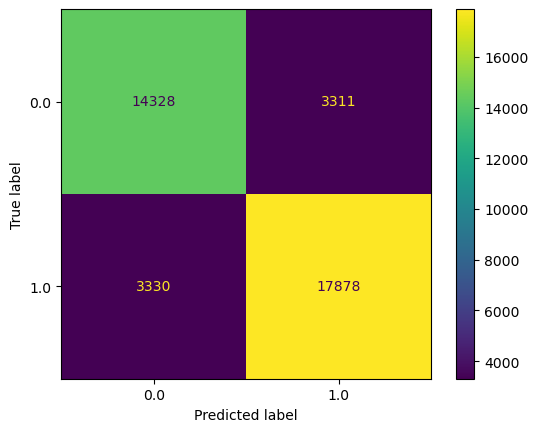

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

---

#### 🎯 Accuracy

**Definition:** The ratio of correctly predicted observations to the total observations.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [ ]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.829047


---

#### ✔️ Precision

**Definition:** Out of all the predicted positive classes, how many are actually positive.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [ ]:
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))

Precision: 0.843740


---

#### 🔁 Recall (Sensitivity, True Positive Rate)

**Definition:** Out of all actual positive classes, how many were correctly predicted.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In [ ]:
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))

Recall: 0.842984


---

## ⚖️ F1 Score

**Definition:** Harmonic mean of precision and recall. It balances the two when you need both to be equally important.

$$
\text{F1\ Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
=
2 \cdot \frac{\frac{TP}{TP + FP} \cdot \frac{TP}{TP + FN}}{\frac{TP}{TP + FP} + \frac{TP}{TP + FN}}
$$


In [ ]:
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

F1 Score: 0.843362


---

These metrics are especially useful when dealing with **imbalanced datasets**, where accuracy alone might be misleading.

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives. 

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

There isn't a large difference in the number of false positives and false negatives. 